
EUDAIMONIA ENGINE

DATA COLLECTION AND PREPARATION

In [ ]:
#IMPORTING THE LIBRARIES

import numpy as np
import pandas as pd
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#READ THE DATASET

df=pd.read_csv("/content/happydata.csv")
df.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [ ]:
df.tail()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
140,5,3,3,4,4,5,1
141,4,3,3,4,4,5,0
142,5,3,2,5,5,5,0


In [ ]:
#HANDLING MISSING VALUES

df.isnull().any()

infoavail        False
housecost        False
schoolquality    False
policetrust      False
streetquality    False
ëvents           False
happy            False
dtype: bool

In [ ]:
df.isnull().sum()

infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
ëvents           0
happy            0
dtype: int64

In [ ]:
#HANDLING DUPLICATES VALUES

df.duplicated().sum()

18

In [ ]:
df.drop_duplicates()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
5,5,5,3,5,5,5,1
...,...,...,...,...,...,...,...
137,5,2,3,4,4,3,1
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
141,4,3,3,4,4,5,0


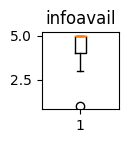

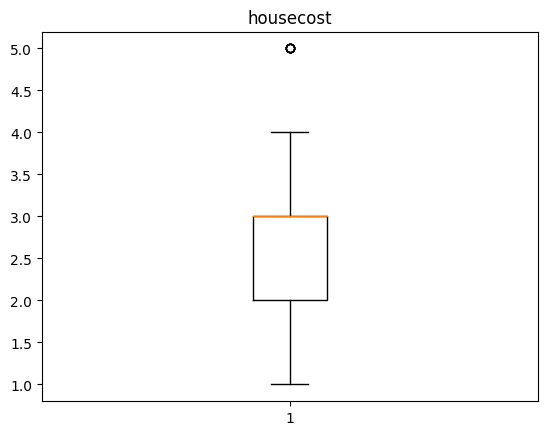

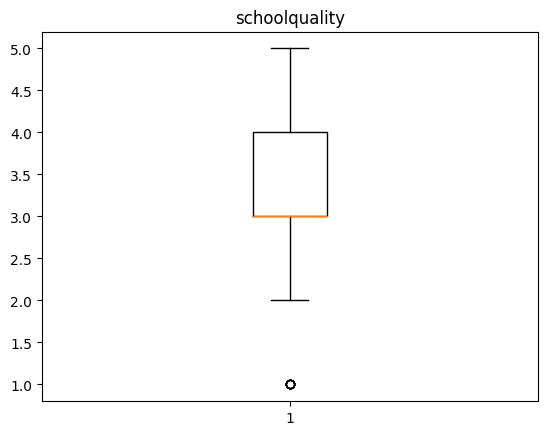

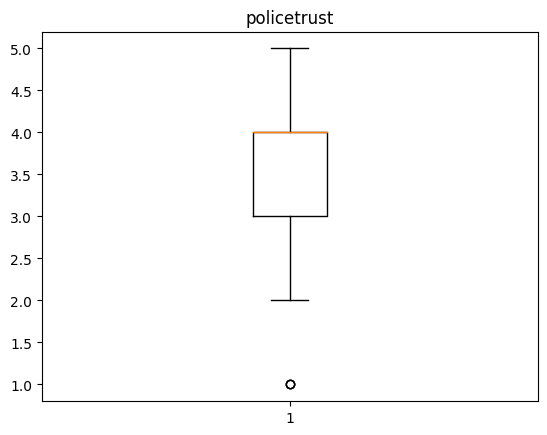

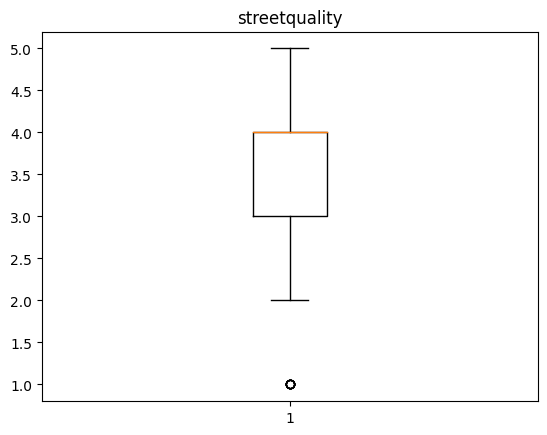

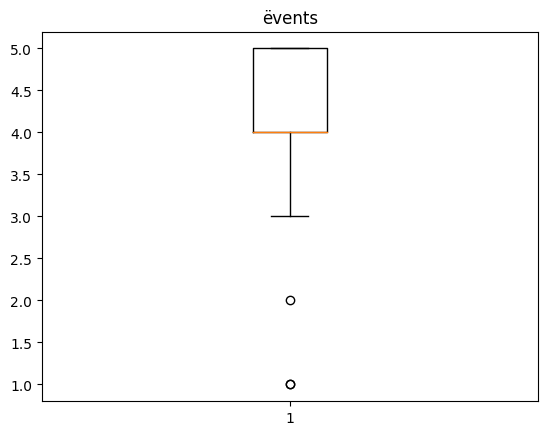

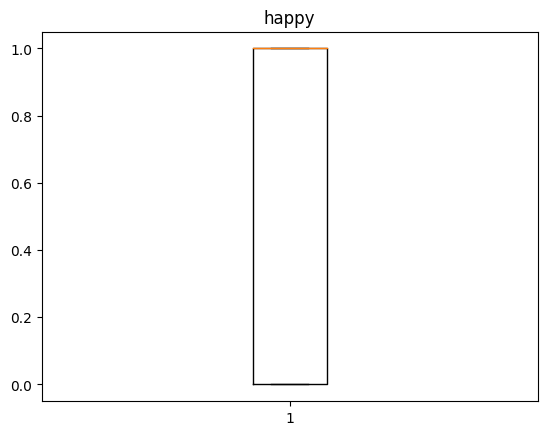

In [ ]:
#HANDLING OUTLIERS

plt.figure(figsize=[1,1])
for i in df:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [ ]:
IQt = []
IQt.append(df["infoavail"].quantile(0.75) - df["infoavail"].quantile(0.25))
IQt

[1.0]

In [ ]:
upper = []
IQt.append(df["infoavail"].quantile(0.75) + 1.5 * IQt[0])
IQt

[1.0, 6.5]

In [ ]:
lower=[]
IQt.append(df["infoavail"].quantile(0.25) - 1.5 * IQt[0])
IQt

[1.0, 6.5, 2.5]

In [ ]:
import numpy as np

df["infoavail"] = np.where(df["infoavail"] == 6.5, 6.5, np.where(df["infoavail"] == 2.5, 2.5, df["infoavail"]))

In [ ]:
IQt = []
IQt.append(df["housecost"].quantile(0.75) - df["housecost"].quantile(0.25))
IQt

[1.0]

In [ ]:
upper = []
IQt.append(df["housecost"].quantile(0.75) + 1.5 * IQt[0])
IQt

[1.0, 4.5]

In [ ]:
lower=[]
IQt.append(df["housecost"].quantile(0.25) - 1.5 * IQt[0])
IQt

[1.0, 4.5, 0.5]

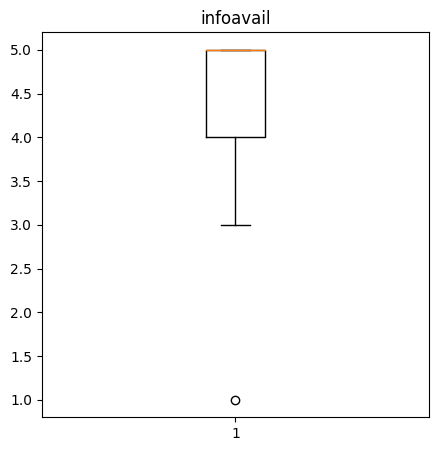

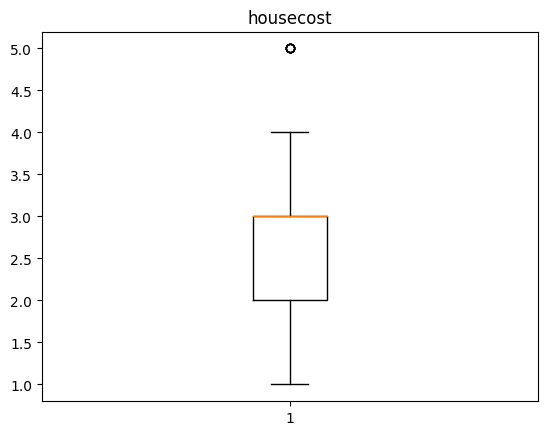

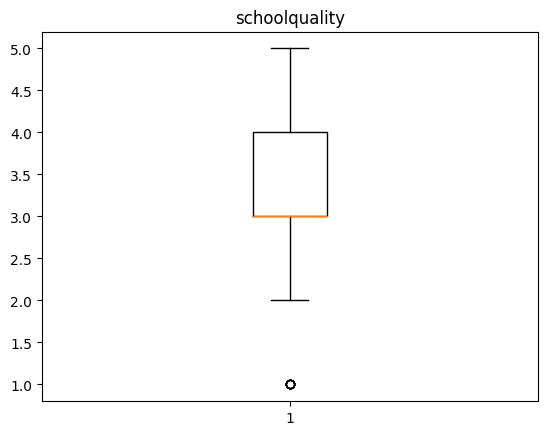

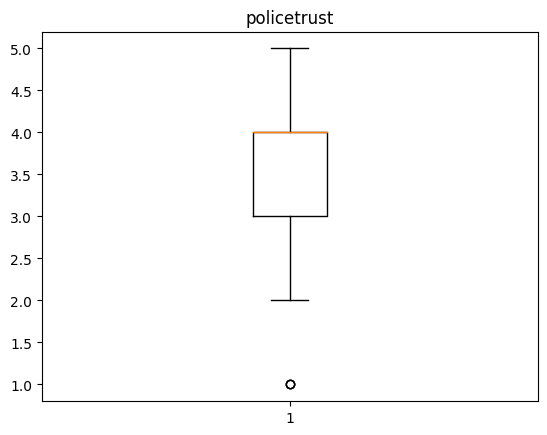

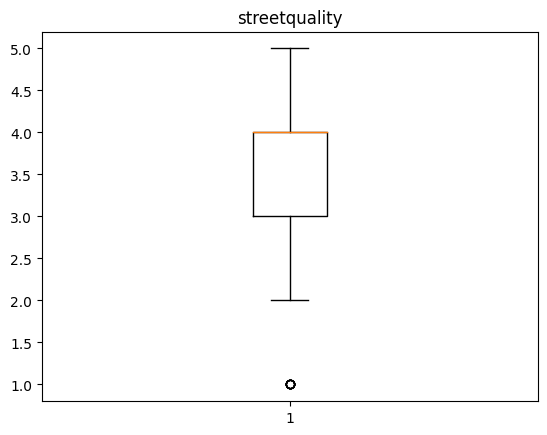

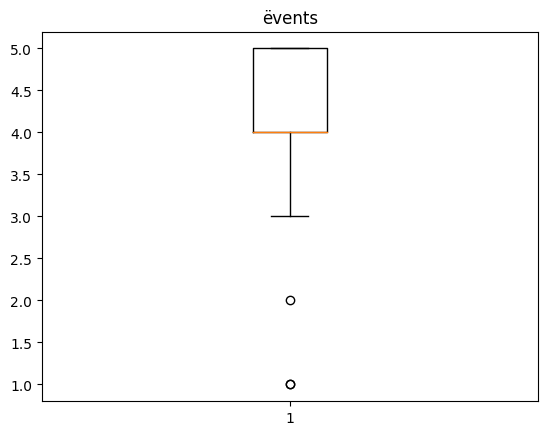

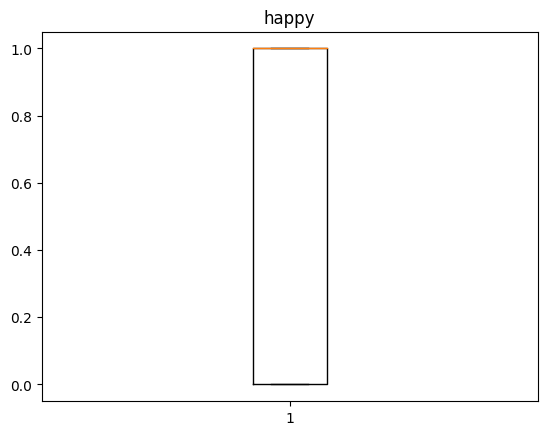

In [ ]:
plt.figure(figsize=(5,5))
for i in df:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

     infoavail  housecost  schoolquality  policetrust  streetquality  \
0     1.649504   0.414219       0.268660     0.339669       1.432491   
1     1.649504   0.483255       0.268660     1.469266       0.341069   
2     0.859848   0.414219       0.268660     0.789928       0.545711   
3     0.859848   1.311693       0.268660     0.789928       0.545711   
4     0.859848   1.311693       0.268660     0.789928       0.545711   
..         ...        ...            ...          ...            ...   
138   0.859848   0.414219       0.268660     3.049122       0.545711   
139   0.859848   0.483255       0.268660     0.339669       1.432491   
140   0.859848   0.414219       0.268660     0.339669       0.341069   
141   0.394828   0.414219       0.268660     0.339669       0.341069   
142   0.859848   0.414219       1.279671     1.469266       1.227849   

       ëvents     happy  
0    0.256330  1.080123  
1    1.438754  1.080123  
2    0.926094  0.925820  
3    0.926094  1.080123  
4    

In [ ]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
print(iqr)

infoavail        1.0
housecost        1.0
schoolquality    1.0
policetrust      1.0
streetquality    1.0
ëvents           1.0
happy            1.0
dtype: float64


In [ ]:
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
print(lower_limit)
print(upper_limit)

infoavail        2.5
housecost        0.5
schoolquality    1.5
policetrust      1.5
streetquality    1.5
ëvents           2.5
happy           -1.5
dtype: float64
infoavail        6.5
housecost        4.5
schoolquality    5.5
policetrust      5.5
streetquality    5.5
ëvents           6.5
happy            2.5
dtype: float64


In [ ]:
outliers=df[(df<lower_limit) | (df>upper_limit)]
outliers

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
138,NaN,NaN,NaN,1.0,NaN,NaN,NaN
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_no_outliers = df[(df >= lower_limit) & (df <= upper_limit)]
df_no_outliers

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3.0,3.0,3.0,4.0,2.0,4.0,0
1,3.0,2.0,3.0,5.0,4.0,3.0,0
2,5.0,3.0,3.0,3.0,3.0,5.0,1
3,5.0,4.0,3.0,3.0,3.0,5.0,0
4,5.0,4.0,3.0,3.0,3.0,5.0,0
...,...,...,...,...,...,...,...
138,5.0,3.0,3.0,NaN,3.0,5.0,0
139,5.0,2.0,3.0,4.0,2.0,5.0,1
140,5.0,3.0,3.0,4.0,4.0,5.0,1
141,4.0,3.0,3.0,4.0,4.0,5.0,0


In [ ]:
import numpy as np # Import numpy if not already done

# Calculate lower and upper limits for 'infoavail' column specifically
q1_infoavail = df['infoavail'].quantile(0.25)
q3_infoavail = df['infoavail'].quantile(0.75)
iqr_infoavail = q3_infoavail - q1_infoavail
lower_limit_infoavail = q1_infoavail - 1.5 * iqr_infoavail
upper_limit_infoavail = q3_infoavail + 1.5 * iqr_infoavail

# Replace outliers in 'infoavail' column
df['infoavail'] = np.where(df['infoavail'] < lower_limit_infoavail, lower_limit_infoavail, df['infoavail'])
df['infoavail'] = np.where(df['infoavail'] > upper_limit_infoavail, upper_limit_infoavail, df['infoavail'])
print(df)

     infoavail  housecost  schoolquality  policetrust  streetquality  ëvents  \
0          3.0          3              3            4              2       4   
1          3.0          2              3            5              4       3   
2          5.0          3              3            3              3       5   
3          5.0          4              3            3              3       5   
4          5.0          4              3            3              3       5   
..         ...        ...            ...          ...            ...     ...   
138        5.0          3              3            1              3       5   
139        5.0          2              3            4              2       5   
140        5.0          3              3            4              4       5   
141        4.0          3              3            4              4       5   
142        5.0          3              2            5              5       5   

     happy  
0        0  
1        0  


In [ ]:
import numpy as np # Import numpy if not already done

# Calculate lower and upper limits for 'infoavail' column specifically
q1_housecost = df['housecost'].quantile(0.25)
q3_housecost = df['housecost'].quantile(0.75)
iqr_housecost = q3_housecost - q1_housecost
lower_limit_housecost = q1_housecost - 1.5 * iqr_housecost
upper_limit_housecost = q3_housecost + 1.5 * iqr_housecost

# Replace outliers in 'infoavail' column
df['housecost'] = np.where(df['housecost'] < lower_limit_housecost, lower_limit_housecost, df['housecost'])
df['housecost'] = np.where(df['housecost'] > upper_limit_housecost, upper_limit_housecost, df['housecost'])
print(df)

     infoavail  housecost  schoolquality  policetrust  streetquality  ëvents  \
0          3.0        3.0              3            4              2       4   
1          3.0        2.0              3            5              4       3   
2          5.0        3.0              3            3              3       5   
3          5.0        4.0              3            3              3       5   
4          5.0        4.0              3            3              3       5   
..         ...        ...            ...          ...            ...     ...   
138        5.0        3.0              3            1              3       5   
139        5.0        2.0              3            4              2       5   
140        5.0        3.0              3            4              4       5   
141        4.0        3.0              3            4              4       5   
142        5.0        3.0              2            5              5       5   

     happy  
0        0  
1        0  


In [ ]:
import numpy as np # Import numpy if not already done

# Calculate lower and upper limits for 'infoavail' column specifically
q1_housecost = df['housecost'].quantile(0.25)
q3_housecost = df['housecost'].quantile(0.75)
iqr_housecost = q3_housecost - q1_housecost
lower_limit_housecost = q1_housecost - 1.5 * iqr_housecost
upper_limit_housecost = q3_housecost + 1.5 * iqr_housecost

# Replace outliers in 'infoavail' column
df['housecost'] = np.where(df['housecost'] < lower_limit_housecost, lower_limit_housecost, df['housecost'])
df['housecost'] = np.where(df['housecost'] > upper_limit_housecost, upper_limit_housecost, df['housecost'])
print(df)

     infoavail  housecost  schoolquality  policetrust  streetquality  ëvents  \
0          3.0        3.0              3            4              2       4   
1          3.0        2.0              3            5              4       3   
2          5.0        3.0              3            3              3       5   
3          5.0        4.0              3            3              3       5   
4          5.0        4.0              3            3              3       5   
..         ...        ...            ...          ...            ...     ...   
138        5.0        3.0              3            1              3       5   
139        5.0        2.0              3            4              2       5   
140        5.0        3.0              3            4              4       5   
141        4.0        3.0              3            4              4       5   
142        5.0        3.0              2            5              5       5   

     happy  
0        0  
1        0  


EXPLORATORY DATA ANALYSIS

In [ ]:
#DESCRIPTIVE STASTISTICAL

df.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.325175,2.513986,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.765126,1.068011,0.992586,0.888383,1.131639,0.848693,0.500271
min,2.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,4.500000,5.000000,5.000000,5.000000,5.000000,1.000000


In [ ]:
import numpy as np # Import numpy if not already done

# Calculate lower and upper limits for 'infoavail' column specifically
q1_schoolquality= df['schoolquality'].quantile(0.25)
q3_schoolquality = df['schoolquality'].quantile(0.75)
iqr_schoolquality = q3_schoolquality - q1_schoolquality
lower_limit_schoolquality = q1_schoolquality - 1.5 * iqr_schoolquality
upper_limit_schoolquality = q3_schoolquality + 1.5 * iqr_schoolquality

# Replace outliers in 'infoavail' column
df['schoolquality'] = np.where(df['schoolquality'] < lower_limit_schoolquality, lower_limit_schoolquality, df['schoolquality'])
df['schoolquality'] = np.where(df['schoolquality'] > upper_limit_schoolquality, upper_limit_schoolquality, df['schoolquality'])
print(df)

     infoavail  housecost  schoolquality  policetrust  streetquality  ëvents  \
0          3.0        3.0            3.0            4              2       4   
1          3.0        2.0            3.0            5              4       3   
2          5.0        3.0            3.0            3              3       5   
3          5.0        4.0            3.0            3              3       5   
4          5.0        4.0            3.0            3              3       5   
..         ...        ...            ...          ...            ...     ...   
138        5.0        3.0            3.0            1              3       5   
139        5.0        2.0            3.0            4              2       5   
140        5.0        3.0            3.0            4              4       5   
141        4.0        3.0            3.0            4              4       5   
142        5.0        3.0            2.0            5              5       5   

     happy  
0        0  
1        0  


In [ ]:
import numpy as np # Import numpy if not already done

# Calculate lower and upper limits for 'infoavail' column specifically
q1_policetrust= df['policetrust'].quantile(0.25)
q3_policetrust = df['policetrust'].quantile(0.75)
iqr_policetrust = q3_policetrust - q1_policetrust
lower_limit_policetrust = q1_policetrust - 1.5 * iqr_policetrust
upper_limit_policetrust = q3_policetrust + 1.5 * iqr_policetrust

# Replace outliers in 'infoavail' column
df['policetrust'] = np.where(df['policetrust'] < lower_limit_policetrust, lower_limit_policetrust, df['policetrust'])
df['policetrust'] = np.where(df['policetrust'] > upper_limit_policetrust, upper_limit_policetrust, df['policetrust'])
print(df)

     infoavail  housecost  schoolquality  policetrust  streetquality  ëvents  \
0          3.0        3.0            3.0          4.0              2       4   
1          3.0        2.0            3.0          5.0              4       3   
2          5.0        3.0            3.0          3.0              3       5   
3          5.0        4.0            3.0          3.0              3       5   
4          5.0        4.0            3.0          3.0              3       5   
..         ...        ...            ...          ...            ...     ...   
138        5.0        3.0            3.0          1.5              3       5   
139        5.0        2.0            3.0          4.0              2       5   
140        5.0        3.0            3.0          4.0              4       5   
141        4.0        3.0            3.0          4.0              4       5   
142        5.0        3.0            2.0          5.0              5       5   

     happy  
0        0  
1        0  


In [ ]:
import numpy as np # Import numpy if not already done

# Calculate lower and upper limits for 'infoavail' column specifically
q1_streetquality= df['streetquality'].quantile(0.25)
q3_streetquality = df['streetquality'].quantile(0.75)
iqr_streetquality = q3_streetquality - q1_streetquality
lower_limit_streetquality = q1_streetquality - 1.5 * iqr_streetquality
upper_limit_streetquality = q3_streetquality + 1.5 * iqr_streetquality

# Replace outliers in 'infoavail' column
df['streetquality'] = np.where(df['streetquality'] < lower_limit_streetquality, lower_limit_streetquality, df['streetquality'])
df['streetquality'] = np.where(df['streetquality'] > upper_limit_streetquality, upper_limit_streetquality, df['streetquality'])
print(df)

     infoavail  housecost  schoolquality  policetrust  streetquality  ëvents  \
0          3.0        3.0            3.0          4.0            2.0       4   
1          3.0        2.0            3.0          5.0            4.0       3   
2          5.0        3.0            3.0          3.0            3.0       5   
3          5.0        4.0            3.0          3.0            3.0       5   
4          5.0        4.0            3.0          3.0            3.0       5   
..         ...        ...            ...          ...            ...     ...   
138        5.0        3.0            3.0          1.5            3.0       5   
139        5.0        2.0            3.0          4.0            2.0       5   
140        5.0        3.0            3.0          4.0            4.0       5   
141        4.0        3.0            3.0          4.0            4.0       5   
142        5.0        3.0            2.0          5.0            5.0       5   

     happy  
0        0  
1        0  


In [ ]:
import numpy as np # Import numpy if not already done

# Calculate lower and upper limits for 'infoavail' column specifically
q1_ëvents= df['ëvents'].quantile(0.25)
q3_ëvents = df['ëvents'].quantile(0.75)
iqr_ëvents = q3_ëvents - q1_ëvents
lower_limit_ëvents = q1_ëvents - 1.5 * iqr_ëvents
upper_limit_ëvents = q3_ëvents + 1.5 * iqr_ëvents

# Replace outliers in 'infoavail' column
df['ëvents'] = np.where(df['ëvents'] < lower_limit_ëvents, lower_limit_ëvents, df['ëvents'])
df['ëvents'] = np.where(df['ëvents'] > upper_limit_ëvents, upper_limit_ëvents, df['ëvents'])
print(df)

     infoavail  housecost  schoolquality  policetrust  streetquality  ëvents  \
0          3.0        3.0            3.0          4.0            2.0     4.0   
1          3.0        2.0            3.0          5.0            4.0     3.0   
2          5.0        3.0            3.0          3.0            3.0     5.0   
3          5.0        4.0            3.0          3.0            3.0     5.0   
4          5.0        4.0            3.0          3.0            3.0     5.0   
..         ...        ...            ...          ...            ...     ...   
138        5.0        3.0            3.0          1.5            3.0     5.0   
139        5.0        2.0            3.0          4.0            2.0     5.0   
140        5.0        3.0            3.0          4.0            4.0     5.0   
141        4.0        3.0            3.0          4.0            4.0     5.0   
142        5.0        3.0            2.0          5.0            5.0     5.0   

     happy  
0        0  
1        0  


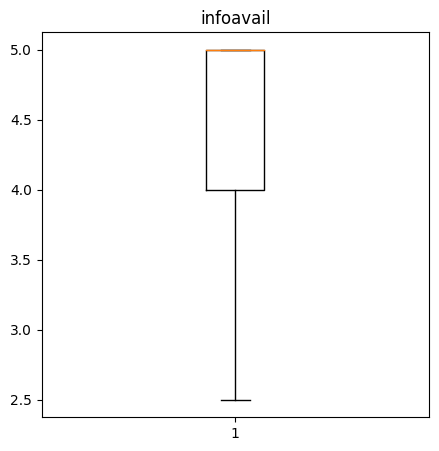

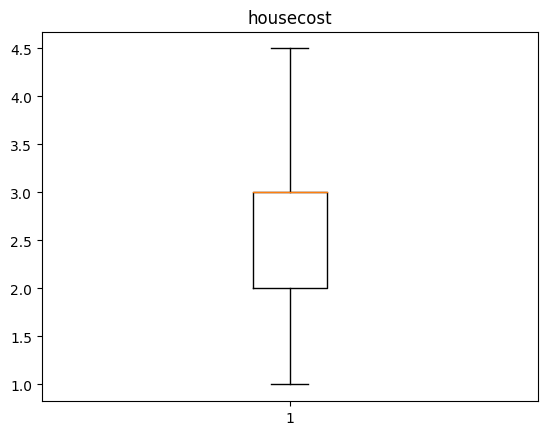

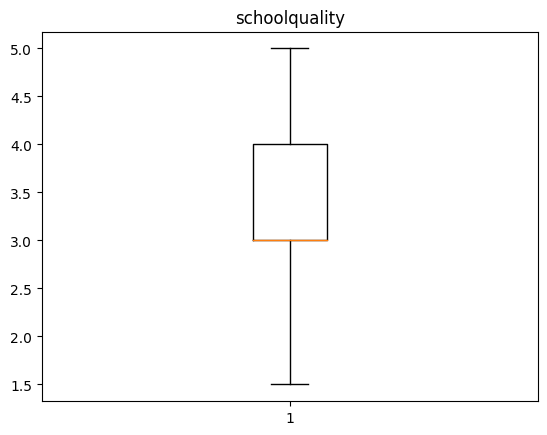

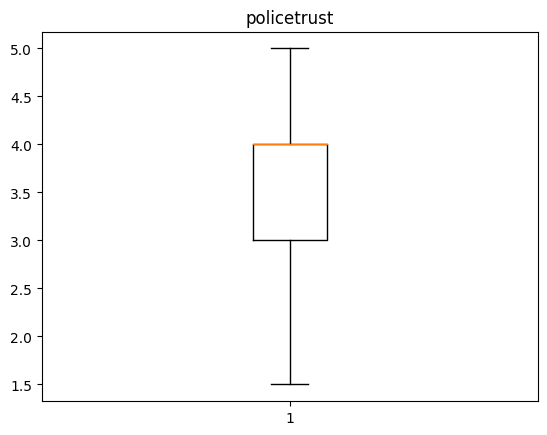

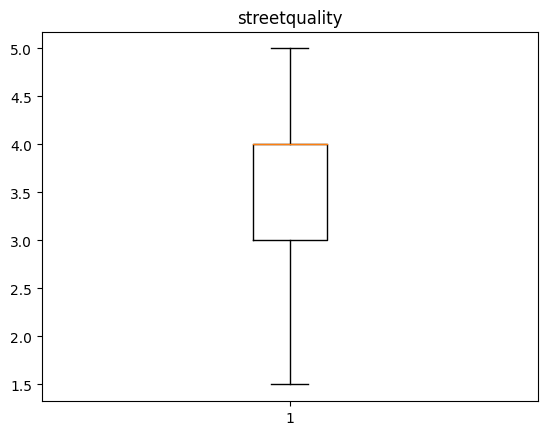

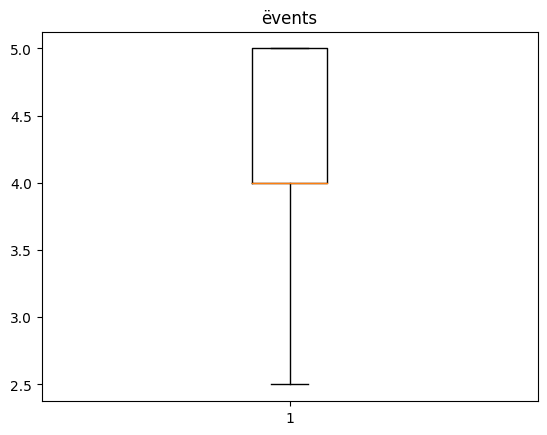

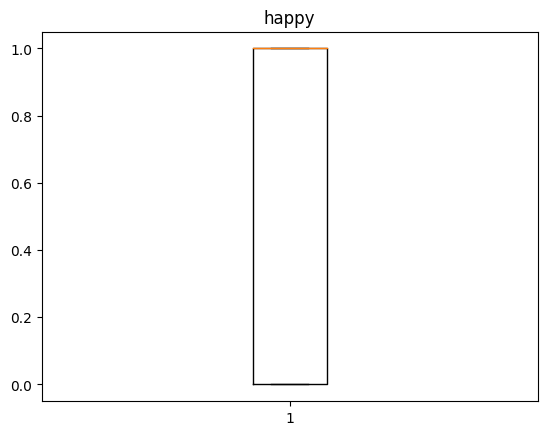

In [ ]:
plt.figure(figsize=(5,5))
for i in df:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

VISUAL ANALYSIS

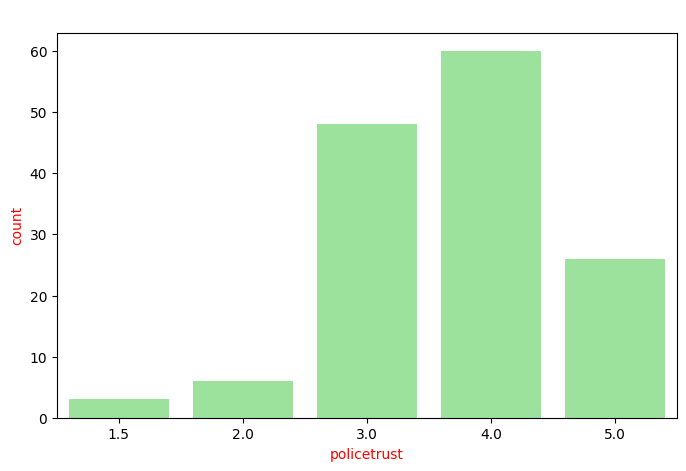

In [ ]:
#UNIVARIATE ANALYSIS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the countplot
plt.figure(figsize=(8, 5))
plt.grid(False)
plt.title(" ", color="red", fontsize=14)
plt.xlabel(None, color="red", fontsize=10)
plt.ylabel(None, color="red", fontsize=10)
sns.countplot(x=df['policetrust'], color='lightgreen')
plt.show()

Text(0.5, 1.0, 'The percentage of Happy and Un happy')

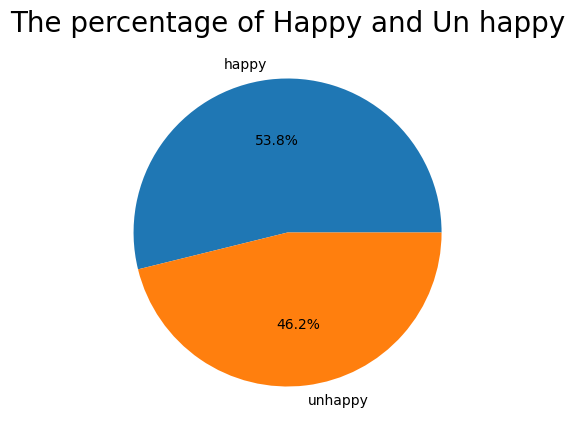

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#pie plot
#checking wheather client are happy or unhappy
plt.figure(figsize=(10, 5))
plt.pie(df.happy.value_counts().values, labels=['happy', 'unhappy'], autopct='%1.1f%%')
plt.title('The percentage of Happy and Un happy',color='black',size=20)

<Axes: title={'center': 'Happiness'}, xlabel='happy', ylabel='happy'>

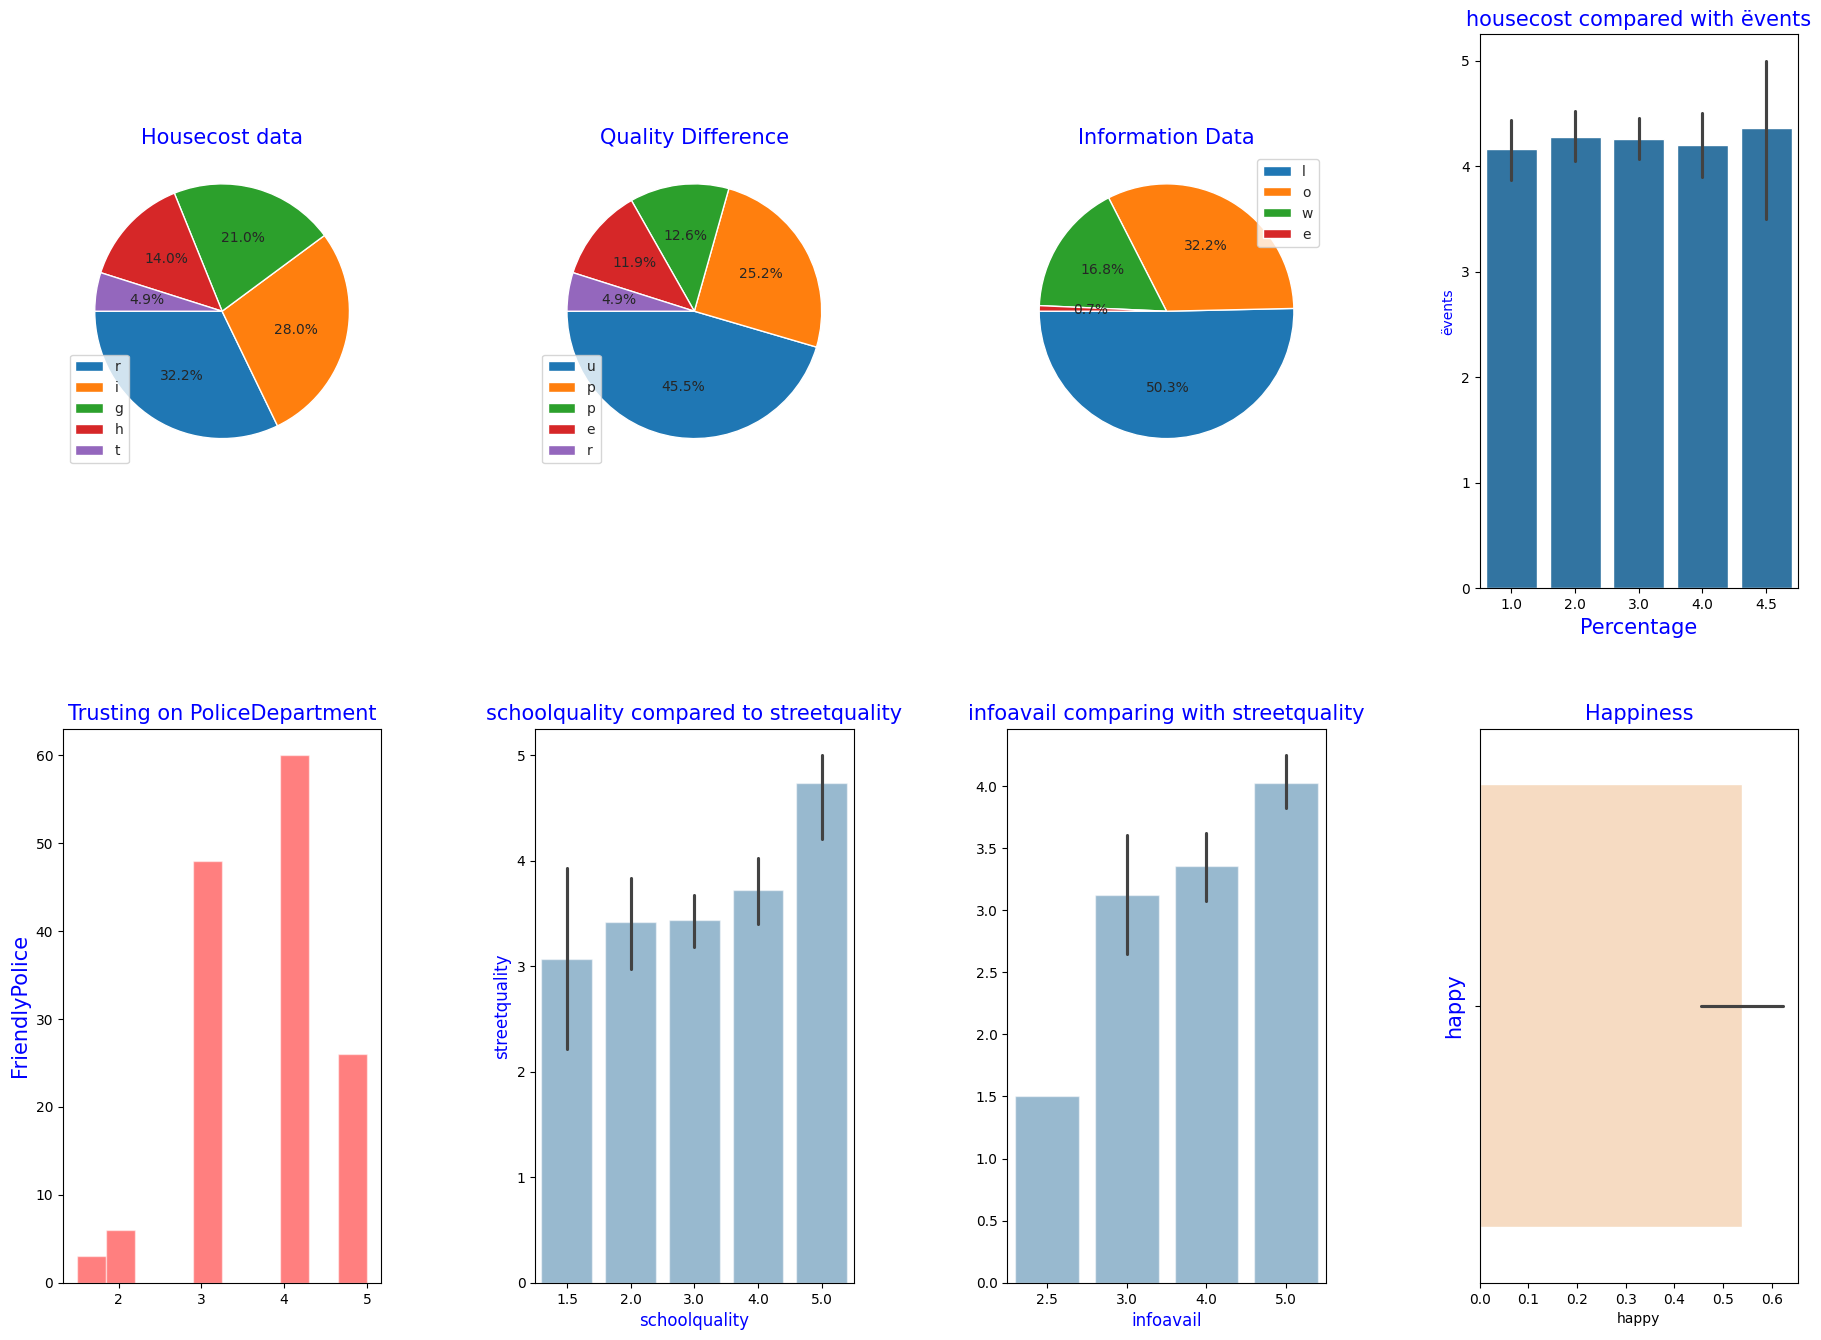

In [ ]:
#BIVARIATE ANALYSIS

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(20,15))
plt.tight_layout(pad=8)
plt.grid(False)

for ax in axes.flatten():
    ax.grid(False)
    sns.set_style("whitegrid")

axes[0,0].set_title('Housecost data', fontsize=15, color='blue')
axes[0,0].pie(df.housecost.value_counts(), autopct='%1.1f%%', startangle=180)
axes[0,0].legend('right')

axes[0,3].set_xlabel("housecost", fontsize=15)
axes[0,3].set_title('housecost compared with ëvents', fontsize=15, color="blue")
axes[0,3].set_xlabel("Percentage", fontsize=15, color="blue")
axes[0,3].set_ylabel(None, color="blue")
sns.barplot(x=df['housecost'], y=df['ëvents'],ax=axes[0,3])

axes[1,1].set_title('schoolquality compared to streetquality', fontsize=15, color="blue")
axes[1,1].set_xlabel('schoolquality', fontsize=12, color='blue')
axes[1,1].set_ylabel('streetquality', fontsize=12, color='blue')
sns.barplot(x=df['schoolquality'], y=df['streetquality'], ax=axes[1,1], alpha=0.5)

axes[0,1].set_title('Quality Difference', fontsize=15, color="blue")
axes[0,1].pie(df.schoolquality.value_counts(),autopct='%1.1f%%',startangle=180)
axes[0,1].legend('upper right')

axes[1,0].hist(df.policetrust, color='red', alpha=0.5)
axes[1,0].set_title('Trusting on PoliceDepartment', fontsize=15, color='blue')
axes[1,0].set_ylabel('FriendlyPolice', fontsize=15, color='blue')

# Modified the 'Infoavail' column to an existing column in the DataFrame
axes[0,2].set_title('Information Data', fontsize=15, color='blue')
axes[0,2].pie(df.infoavail.value_counts(),autopct='%1.1f%%',startangle=180)
axes[0,2].legend('lower left')

axes[1,2].set_title('infoavail comparing with streetquality', fontsize=15, color='Blue')
axes[1,2].set_xlabel('infoavail',fontsize=12,color="blue")
axes[1,2].set_ylabel(' ',fontsize=12,color='blue')
sns.barplot(x=df['infoavail'],y=df['streetquality'],ax=axes[1,2],alpha=0.5)

axes[1,3].set_title("Happiness" ,fontsize=15,color='blue')
axes[1,3].set_ylabel('happy',fontsize=15,color='blue')
sns.barplot(x=df['happy'],ax=axes[1,3],color='peachpuff')

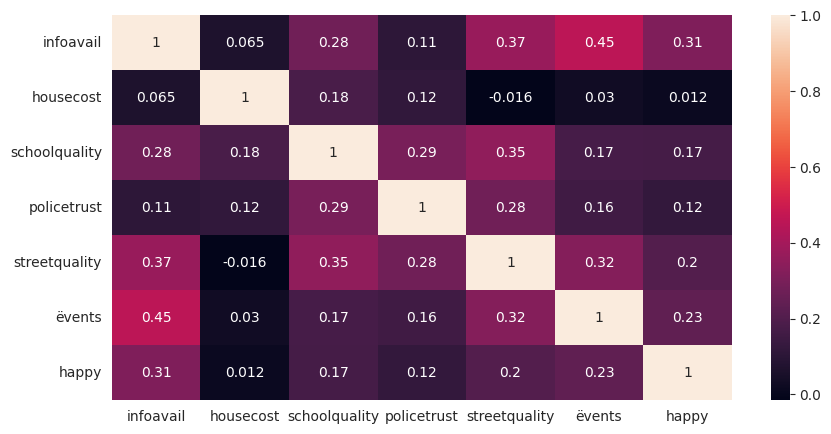

In [ ]:
#MULTIVARIATE ANALYSIS

#heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

MODEL BUILDING

In [ ]:
#TRAINING THE MODEL

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

from sklearn.neighbors import KNeighborsClassifier
log=KNeighborsClassifier()

from sklearn.svm import SVC
svc=SVC()

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from sklearn.preprocessing import StandardScaler

In [ ]:
# Separate the independent variables
x = df.drop(columns='happy',axis=1)

# Separate the target variable
y = df['happy']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize and fit the scaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)

# X_trian = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
#DECISION TREE MODEL

dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)

#Obtain predictions for train and test sets
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

#Calculate metrics for train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1score = f1_score(y_train, y_train_pred, average='weighted')

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1score = f1_score(y_test, y_test_pred, average='weighted')

#Print the metrics
print("dt-Train Accuracy:", train_accuracy)
print("dt-Test Accuracy:", test_accuracy)

print("dt-Train Precision:", train_precision)
print("dt-Test Precision:", test_precision)

print("dt-Train Recall:", train_recall)
print("dt-Test Recall:", test_recall)

print("dt-Train F1-score:", train_f1score)
print("dt-Test F1-score:", test_f1score)

dt-Train Accuracy: 0.9385964912280702
dt-Test Accuracy: 0.6551724137931034
dt-Train Precision: 0.940096775065553
dt-Test Precision: 0.6646098003629762
dt-Train Recall: 0.9385964912280702
dt-Test Recall: 0.6551724137931034
dt-Train F1-score: 0.938696087558047
dt-Test F1-score: 0.6467207572684247


In [ ]:
#RANDOM FOREST MODEL

# Initialize and fit the scaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

#Obtain predictions for train and test sets
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

#Calculate metrics for train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1score = f1_score(y_train, y_train_pred, average='weighted')

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1score = f1_score(y_test, y_test_pred, average='weighted')

#Print the metrics
print("rf-Train Accuracy:", train_accuracy)
print("rf-Test Accuracy:", test_accuracy)

print("rf-Train Precision:", train_precision)
print("rf-Test Precision:", test_precision)

print("rf-Train Recall:", train_recall)
print("rf-Test Recall:", test_recall)

print("rf-Train F1-score:", train_f1score)
print("rf-Test F1-score:", test_f1score)

rf-Train Accuracy: 0.9385964912280702
rf-Test Accuracy: 0.5517241379310345
rf-Train Precision: 0.940096775065553
rf-Test Precision: 0.5506792058516197
rf-Train Recall: 0.9385964912280702
rf-Test Recall: 0.5517241379310345
rf-Train F1-score: 0.938696087558047
rf-Test F1-score: 0.5452037617554858


In [ ]:
#KNN MODEL

log=KNeighborsClassifier()
log.fit(x_train, y_train)

#Obtain predictions for train and test sets
y_train_pred = log.predict(x_train)
y_test_pred = log.predict(x_test)

#Calculate metrics for train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1score = f1_score(y_train, y_train_pred, average='weighted')

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1score = f1_score(y_test, y_test_pred, average='weighted')

#Print the metrics
print("log-Train Accuracy:", train_accuracy)
print("log-Test Accuracy:", test_accuracy)

print("log-Train Precision:", train_precision)
print("log-Test Precision:", test_precision)

print("log-Train Recall:", train_recall)
print("log-Test Recall:", test_recall)

print("log-Train F1-score:", train_f1score)
print("log-Test F1-score:", test_f1score)

log-Train Accuracy: 0.6578947368421053
log-Test Accuracy: 0.3793103448275862
log-Train Precision: 0.6579914537429441
log-Test Precision: 0.3423645320197044
log-Train Recall: 0.6578947368421053
log-Test Recall: 0.3793103448275862
log-Train F1-score: 0.6516003269823305
log-Test F1-score: 0.3463949843260188


In [ ]:
#SVC MODEL

svc=SVC()
svc.fit(x_train,y_train)

#Obtain predictions for train and test sets
y_train_pred = svc.predict(x_train)
y_test_pred = svc.predict(x_test)

#Calculate metrics for train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1score = f1_score(y_train, y_train_pred, average='weighted')

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1score = f1_score(y_test, y_test_pred, average='weighted')

#Print the metrics
print("svc-Train Accuracy:", train_accuracy)
print("svc-Test Accuracy:", test_accuracy)

print("svc-Train Precision:", train_precision)
print("svc-Test Precision:", test_precision)

print("svc-Train Recall:", train_recall)
print("svc-Test Recall:", test_recall)

print("svc-Train F1-score:", train_f1score)
print("svc-Test F1-score:", test_f1score)

svc-Train Accuracy: 0.7017543859649122
svc-Test Accuracy: 0.4827586206896552
svc-Train Precision: 0.7008904837852207
svc-Test Precision: 0.4731800766283525
svc-Train Recall: 0.7017543859649122
svc-Test Recall: 0.4827586206896552
svc-Train F1-score: 0.7004495614035087
svc-Test F1-score: 0.46348254444206477


In [ ]:
#LOGISTIC MODEL

lr=LogisticRegression()
lr.fit(x_train,y_train)

#Obtain predictions for train and test sets
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

#Calculate metrics for train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1score = f1_score(y_train, y_train_pred, average='weighted')

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1score = f1_score(y_test, y_test_pred, average='weighted')

#Print the metrics
print("lr-Train Accuracy:", train_accuracy)
print("lr-Test Accuracy:", test_accuracy)

print("lr-Train Precision:", train_precision)
print("lr-Test Precision:", test_precision)

print("lr-Train Recall:", train_recall)
print("lr-Test Recall:", test_recall)

print("lr-Train F1-score:", train_f1score)
print("lr-Test F1-score:", test_f1score)

lr-Train Accuracy: 0.6228070175438597
lr-Test Accuracy: 0.5517241379310345
lr-Train Precision: 0.6204932621408594
lr-Test Precision: 0.5506792058516197
lr-Train Recall: 0.6228070175438597
lr-Test Recall: 0.5517241379310345
lr-Train F1-score: 0.6192746365796447
lr-Test F1-score: 0.5452037617554858


In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7586206896551724


In [ ]:
#Classification Report
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.72      0.87      0.79        15

    accuracy                           0.76        29
   macro avg       0.77      0.75      0.75        29
weighted avg       0.77      0.76      0.76        29



In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 9  5]
 [ 2 13]]


In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.5172413793103449


In [ ]:
#Classification Report
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.50      0.36      0.42        14
           1       0.53      0.67      0.59        15

    accuracy                           0.52        29
   macro avg       0.51      0.51      0.50        29
weighted avg       0.51      0.52      0.51        29



In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 5  9]
 [ 5 10]]


In [ ]:
log=KNeighborsClassifier()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.3793103448275862


In [ ]:
#Classification Report
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.25      0.14      0.18        14
           1       0.43      0.60      0.50        15

    accuracy                           0.38        29
   macro avg       0.34      0.37      0.34        29
weighted avg       0.34      0.38      0.35        29



In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 2 12]
 [ 6  9]]


In [ ]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [ ]:
y_pred=log.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.3793103448275862


In [ ]:
#Classification Report
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.25      0.14      0.18        14
           1       0.43      0.60      0.50        15

    accuracy                           0.38        29
   macro avg       0.34      0.37      0.34        29
weighted avg       0.34      0.38      0.35        29



In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 2 12]
 [ 6  9]]


In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=log.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.3793103448275862


In [ ]:
#Classification Report
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.25      0.14      0.18        14
           1       0.43      0.60      0.50        15

    accuracy                           0.38        29
   macro avg       0.34      0.37      0.34        29
weighted avg       0.34      0.38      0.35        29



In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 2 12]
 [ 6  9]]


In [ ]:
#TESTING THE MODEL

rf.predict(sc.transform([[3,2,3,5,4,3]]))

array([0])

In [ ]:
#HYPERPARAMETER TUNING
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.6403162055335968


In [ ]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Best Parameters:", accuracy)

Accuracy with Best Parameters: 0.6206896551724138


In [ ]:
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
# Assuming 'lr' is your LogisticRegression object and you want to tune its parameters
param_grid = {
    'C': [0.1, 1, 10],  # Example parameters for LogisticRegression
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Best Parameters:", accuracy)

Accuracy with Best Parameters: 0.5517241379310345


HYPERPARAMETER TUNING

In [ ]:
#Hyperparameter Tuning for Decision Tree Model
#Define Decision Tree Classifier
dt=DecisionTreeClassifier()

#Hyperparemeter Tuning
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(x_train, y_train)  # Assuming you have x_train and y_train defined

# Access best parameters for Decision Tree
best_params_dt = grid_search_dt.best_params_

best_criterion = best_params_dt['criterion']
best_max_depth = best_params_dt['max_depth']
best_min_samples_split = best_params_dt['min_samples_split']
best_min_samples_leaf = best_params_dt['min_samples_leaf']

# Create the tuple
best_param = (best_criterion, best_max_depth, best_min_samples_split, best_min_samples_leaf)

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming you have defined and trained your classifier model
classifier = dt
classifier.fit(x_train, y_train)

# Evaluate the performance of the tuned model
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Optimal Hyperparameters: {best_param}')
print(f'Accuracy on test set: {accuracy}')

Optimal Hyperparameters: ('entropy', None, 10, 1)
Accuracy on test set: 0.7241379310344828


In [ ]:
#Hyperparameter Tuning for Random Forest Model
#Define Random forest Tree Classifier
rf = RandomForestClassifier()
#Hyperparemeter Tuning
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming you have defined and trained your classifier model
classifier = rf
classifier.fit(x_train, y_train)

# Evaluate the performance of the tuned model
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Optimal Hyperparameters: {best_param}')
print(f'Accuracy on test set: {accuracy}')

Optimal Hyperparameters: ('entropy', None, 10, 1)
Accuracy on test set: 0.5517241379310345


In [ ]:
#Hyperparameter Tuning For KNN Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the kNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameters to tune
parameters = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric to use for the tree
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, parameters, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the performance of the tuned model
accuracy = accuracy_score(y_test, y_pred)
print(f'Optimal Hyperparameters: {best_params}')
print(f'Accuracy on test set: {accuracy}')

Optimal Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Accuracy on test set: 0.5517241379310345


In [ ]:
#Hyperparameter Tuning For SVC Model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the SVC classifier
svc = SVC()

# Define the hyperparameters to tune
parameters = {
    'C': [0.1, 1, 10],            # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']     # Kernel coefficient
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svc, parameters, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the performance of the tuned model
accuracy = accuracy_score(y_test, y_pred)
print(f'Optimal Hyperparameters: {best_params}')
print(f'Accuracy on test set: {accuracy}')

Optimal Hyperparameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy on test set: 0.4827586206896552


In [ ]:
#Hyperparameter Tuning For Logistic Model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the Logistic Regression classifier
log_reg = LogisticRegression()

# Define the hyperparameters to tune
parameters = {
    'penalty': ['l1', 'l2'],                  # Regularization type
    'C': [0.1, 0.5, 1, 2, 5, 10],             # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],           # Optimization algorithm
    'max_iter': [100, 200, 300]                # Maximum number of iterations
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(log_reg, parameters, cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the performance of the tuned model
accuracy = accuracy_score(y_test, y_pred)
print(f'Optimal Hyperparameters: {best_params}')
print(f'Accuracy on test set: {accuracy}')

Optimal Hyperparameters: {'C': 2, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on test set: 0.4827586206896552


PERFORMANCE XGBCLASSIFIER MODEL

In [ ]:
# Import XGBoost
import xgboost as xgb

# Create an instance of the XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Fit the XGBoost model to your training data
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_train_xgb = np.where(y_train == 'yes',1,0)

In [ ]:
# Assuming xgb_clf is the trained XGBoost model from the previous code
y_pred = xgb_clf.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.5517241379310345


MODEL DEPLOYMENT

In [ ]:
#SAVE THE BEST MODEL
import pickle

In [ ]:
pickle.dump(dt,open('happy.pkl','wb'))